In [1]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
import pandas as pd
train=pd.read_csv('D:/Task to do/train.csv')
train=train.dropna()


In [3]:
# train.corr()

In [33]:
test=pd.read_csv('D:/Task to do/test.csv')
test

,user_id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,57,19364,213,51,2,8,1,2,15,26,...,0,0,0,0,0,0,0,0,0,0
1,58,16000,212,13,3,11,1,2,15,26,...,0,0,0,0,0,0,0,0,0,0
2,59,14482,78,51,2,8,1,2,15,26,...,0,0,0,0,0,0,0,1,0,0
3,60,18074,175,51,2,8,1,2,15,26,...,0,1,0,0,0,0,0,1,0,0
4,61,4807,213,71,3,11,1,2,15,18,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24143,482942,8559,152,58,3,16,4,4,5,28,...,0,0,0,0,0,0,0,0,1,0
24144,482943,8124,213,28,3,16,4,4,22,36,...,0,0,0,0,0,0,0,0,0,0
24145,482944,12615,95,14,2,2,4,4,22,14,...,0,0,0,0,0,0,0,0,0,0
24146,482945,8708,45,13,3,16,4,4,3,1,...,0,0,5,0,0,0,0,0,0,0


In [5]:
test.shape
# x_train.shape

(24148, 52)

In [6]:
y_train=train['label']
x_train=train.drop(['user_id','label'],axis=1)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline


In [11]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x_train)
pca=PCA()

pca.fit_transform(scaled_data)
variation=pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), variation)
ax.set_xlabel('Principal Component #')

In [36]:


cum_sum_eigenvalues = np.cumsum(variation)
#
# Create the visualization plot
#
plt.bar(range(0,len(variation)), variation, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


tree_to_classify=DecisionTreeClassifier(random_state=0)
tree_to_classify.fit(x_train,y_train)

test=test.drop(['user_id'],axis=1)
y_predict_tree=tree_to_classify.predict(test)


my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestClassifier( random_state=0))
])

depth=[]
for i in range(80,100):
    clf = RandomForestClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
                 
print(depth)

In [41]:
joblib.dump(clf,'fiverr_model99=87.pkl')

['fiverr_model99=87.pkl']

In [54]:
no_of_zero=0
no_of_one=0
for i in y_train:
    if i==0:
        no_of_zero=no_of_zero+1
    elif i==1:
        no_of_one=no_of_one+1
    else:
        print('no found')

print('no of zeros',no_of_zero)
print('no of one',no_of_one)

no of zeros 446471
no of one 12321


In [22]:
class_one=train.loc[train['label']==1]

In [23]:
class_zero=train[train['label']==0].sample(len(class_one),random_state=0)

In [24]:
balenced=pd.concat([class_one,class_zero])

In [29]:
y_balanced=train['label']
x_balanced=train.drop(['user_id','label'],axis=1)

Text(0.5, 0, 'Principal Component #')

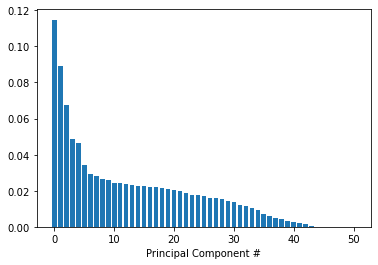

In [30]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x_balanced)
pca=PCA()

pca.fit_transform(scaled_data)
variation=pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), variation)
ax.set_xlabel('Principal Component #')

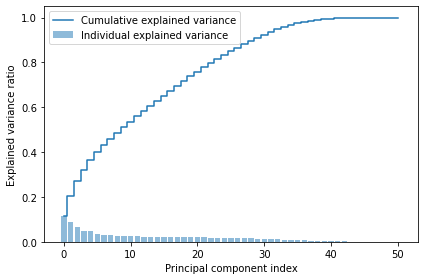

In [31]:
cum_sum_eigenvalues = np.cumsum(variation)
#
# Create the visualization plot
#
plt.bar(range(0,len(variation)), variation, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [40]:
%%time
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestClassifier( random_state=0))
])

depth=[]
for i in range(20,22):
    clf = RandomForestClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=scaled_data, y=y_balanced, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))
                 
print(depth)

[(20, 0.8538177590479338), (21, 0.8483796072581129)]
CPU times: total: 719 ms
Wall time: 6min 49s
